In [25]:
import os
from PIL import Image, ImageChops, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

%matplotlib inline

In [4]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_h_3(im1, im2, im3):
    dst = Image.new('RGB', (im1.width + im2.width + im3.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width + im2.width, 0))
    return dst

def get_concat_h_4(im1, im2, im3, im4):
    dst = Image.new('RGB', (im1.width + im2.width + im3.width + im4.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width + im2.width, 0))
    dst.paste(im4, (im1.width + im2.width + im3.width, 0))
    return dst

In [5]:
valid_output_text_file = "/global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/valid_output_logs.txt" #when running for mode=valid, do 
images_dir = "/global/cfs/projectdirs/cosmo/work/users/usf_cs690_2022_fall/galaxy_simulated/ArcAlwaysPresent/valid/images/"
gt_dir = "/global/cfs/projectdirs/cosmo/work/users/usf_cs690_2022_fall/galaxy_simulated/ArcAlwaysPresent/valid/arcs/"
pred_dir = "/global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1/"
sav_dir = "/global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/"

seg_b80 = "1-Below80"
seg_80to90 = "2-80to90"
seg_a90 = "3-Above90"


os.makedirs(sav_dir + seg_b80, exist_ok=True)
os.makedirs(sav_dir + seg_80to90, exist_ok=True)
os.makedirs(sav_dir + seg_a90, exist_ok=True)

In [6]:
with open(valid_output_text_file) as f:
    lines = f.readlines()
    image_name_ind=0
    score_ind = 2
    i = 0
    data_list = []
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_tot = 0
    while i<len(lines)-1:
        print(i)
        #valid_dic[lines[image_name_ind+i]] = lines[score_ind+i]
        #print(image_name_ind+i, lines[image_name_ind+i])
        #print(score_ind+i, lines[score_ind+i])
        i+=3
            
        #name = lines[image_name_ind+i].split(".png")[0]+".png"
        name = lines[image_name_ind+i][0:-1]   #todo - change it for new script
        score = lines[score_ind+i][0:-1] #todo - change it for new script
#         print(name)
#         print(score)
#         print("**")
        
#         print(name)
        image_path = images_dir + name
        assert os.path.isfile(image_path)
        
        gt_path = gt_dir + name
        assert os.path.isfile(gt_path)
        
        pred_path = pred_dir + name
        assert os.path.isfile(pred_path)
        
        data_list.append([image_path, gt_path, pred_path])
        
        image_np = cv2.imread(image_path)
        gt_np = cv2.imread(gt_path)
        pred__np = cv2.imread(pred_path)
        
        im_gt = Image.fromarray(np.asarray(gt_np))
        im_pred = Image.fromarray(np.asarray(pred__np))
            
        diff_im = ImageChops.difference(im_gt, im_pred)
        
        
        image = Image.open(image_path)
#         print(image.size)
#         plt.imshow(image)
#         plt.figure()
    
        
        gt = Image.open(gt_path)
        #print(gt)
        #plt.imshow(gt)
        #plt.figure()
        
        pred = Image.open(pred_path)
#         print(pred)
#         plt.imshow(pred, cmap="gray")
#         plt.figure()
        
        #diff = ImageChops.difference(gt, pred)
        #print(diff.size)
#         plt.imshow(diff_im)
#         plt.figure()
        
        dst = get_concat_h_4(image, gt, pred, diff_im)
        
#         plt.imshow(dst)
#         plt.figure()

        # myFont = ImageFont.truetype('FreeMono.ttf', 110)
        
        # Call draw Method to add 2D graphics in an image
        I1 = ImageDraw.Draw(dst)
        
        f1_score_num = score.split(",")[2].split(":")[1]
        f1_score = "F1 Score: "+ f1_score_num

        # Add Text to an image
        I1.text((10, 10), f1_score, fill=(255, 0, 0))
        
        # save_path = "GS-AMP-VD-1_diff_seg"
        # /" + name
        print(f1_score_num)
        
        f1_score_num = float(f1_score_num)
        

        
        
        if f1_score_num < 0.80:
            seg_dir = seg_b80
            count_1 += 1
            count_tot += 1
        elif f1_score_num >= 0.80 and f1_score_num < 0.90:
            seg_dir = seg_80to90
            count_2 += 1
            count_tot += 1
        elif f1_score_num >= 0.90:
            seg_dir = seg_a90
            count_3 += 1
            count_tot += 1
            
        
            
        assert os.path.isdir(sav_dir), sav_dir
        
        save_path = sav_dir + seg_dir + "/" + name
            
        print("Saving",save_path)
        dst.save(save_path)
        
    print(count_1)
    print(count_2)
    print(count_3)
    print(count_tot)

0
 0.995650
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/5098.png
3
 0.995569
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/6670.png
6
 0.577817
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/1-Below80/4599.png
9
 0.996555
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/9506.png
12
 0.996339
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/6877.png
15
 0.975328
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/19312.png
18
 0.995870
Saving /global/homes/s/ssriv/Finding_Gravitational_Lensing/IS-Net/valid_output/1/GS-AAP-VD-1-diff-seg/3-Above90/15208.png
21
 0.995870
Saving /global/homes/s/ssriv/Finding_Gravitational_

IndexError: list index out of range

In [7]:
print("Below 80:", count_1)
print("Between 80 and 90:", count_2)
print("Above 90:", count_3)
print("Total:", count_tot)

9
15
940
964


In [16]:
run_code = 'lenses'
gt_im = "/global/cfs/projectdirs/cosmo/work/users/usf_cs690_2022_fall/galaxy_simulated/ArcMayPresent/valid/images"
gt_mask = "/global/cfs/projectdirs/cosmo/work/users/usf_cs690_2022_fall/galaxy_simulated/ArcMayPresent/valid/"+run_code
pred_mask = "/global/homes/s/skendre/image_seg/Finding_Gravitational_Lensing/IS-Net/valid_output/results_lens/v1/GS-AMP-VD-Lenses-1"

In [21]:
pred_fname = glob.glob(pred_mask+os.sep+'*.png')
pred_fname.sort()

gt_mask_fname = glob.glob(gt_mask+os.sep+'*.png')
gt_mask_fname.sort()

gt_im_fname = glob.glob(gt_im+os.sep+'*.png')
gt_im_fname.sort()

In [64]:
def show_imgs(im_idx):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5),subplot_kw=dict(xticks=[], yticks=[]))
    images = []
    images.append(("org img",mpimg.imread(gt_im_fname[im_idx])))
    images.append(("gt", mpimg.imread(gt_mask_fname[im_idx])))
    images.append(("pred", mpimg.imread(pred_fname[im_idx])))
    
    for i in range(3):
        axs[i].set_title(images[i][0], color="black", fontdict={'fontsize':24})
        axs[i].imshow(images[i][1], cmap="gray")
        
    plt.show()

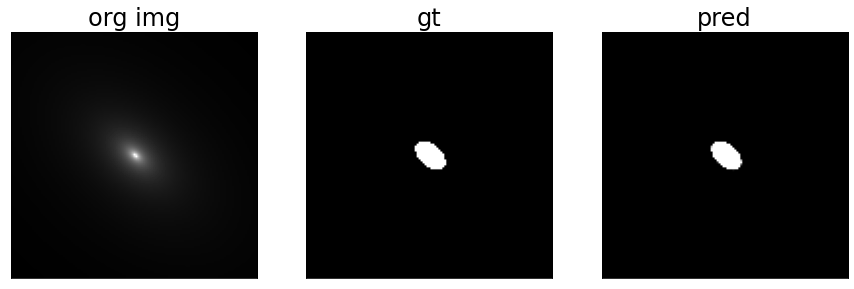

In [66]:
show_imgs(99)